# CHAPTER 11 DATA ALGORITHM

Sentiment Analysis:
This is a sentiment analysis on social media for 100 tweets on news medial selected:
BBC,CNN,CBS,FoxNew and New York Times.The data collected were analyzed below:

In [4]:
!pip install tweepy
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


You are using pip version 18.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
!pip install vaderSentiment
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

You are using pip version 18.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
# Twitter API Keys
access_token = "966112597975150592-I6l9SD8IOj3OYmQBkOnNeRLr3lyqsrN"
access_token_secret = "HR3Eiyfh3kG16zTraLdXCtcNLMhXOdU23UH8cYfNkzRBV"
consumer_key = "rjQVbO0NyrvcuJDT91752ex11"
consumer_secret = "zufLHHrPOWN1sF8JocuB36wj4yZWscIwUGwQYkh8TYfCG9aRIG"


In [7]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target Search Term of the various Media channels
Media_users = ("@CBS", "@CTVNews", "@CNN","@FoxNews", "@nytimes")

# Array to hold sentiment
Sentiment_array = []

# Extracting the first 100 tweets in each Media Channel
print("Beginning of extraction of the posted tweets from the media channels")

for user in Media_users:
    # Setting the tweet count as 100
    tweetcount=100
    print("Start tweets from %s"%user)
    
    # Extracting 5 pages of tweets
    for x in range(5):
        public_tweets=api.user_timeline(user,page=x)
        # For each tweet 
        for tweet in public_tweets:
            #Calculating the compound,positive,negative and neutral value for each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            # Store Tweet in Array
            Sentiment_array.append({"Media":user,
                                    "Tweet Text":tweet["text"],
                                    "Compound":compound,
                                    "Positive":pos,
                                    "Negative":neg,
                                    "Neutral":neu,
                                    "Date":tweet["created_at"],
                                    "Tweets Ago":tweetcount})
            #Decreasing tweet count by 1
            tweetcount-=1

print("Stop Extraction of Tweets")


Beginning of extraction of the posted tweets from the media channels
Start tweets from @CBS
Start tweets from @CTVNews
Start tweets from @CNN
Start tweets from @FoxNews
Start tweets from @nytimes
Stop Extraction of Tweets


In [8]:
# Creating a dataframe from the Sentiment Array
Sentiment_DF=pd.DataFrame.from_dict(Sentiment_array)
# Removing the '@' from Media column in the data frame
Sentiment_DF['Media'] = Sentiment_DF['Media'].map(lambda x: x.lstrip('@'))

# Re_arranging the order of columns before saving into CSV file
Sentiment_DF=Sentiment_DF[["Media","Date","Tweet Text","Compound","Positive","Negative","Neutral","Tweets Ago"]]
# Storing into a CSV File\
Sentiment_DF.to_csv("Output/Media_SentimentAnalysis.csv")

Sentiment_DF.head(10)




,Media,Date,Tweet Text,Compound,Positive,Negative,Neutral,Tweets Ago
0,CBS,Sun May 31 17:23:02 +0000 2020,https://t.co/QupBjXGH3L,0.0000,0.000,0.000,1.000,100
1,CBS,Sat May 30 16:12:28 +0000 2020,RT @etnow: Take a look back at the father-son ...,0.3818,0.102,0.000,0.898,99
2,CBS,Sat May 30 15:49:26 +0000 2020,It's the special we all need right now. #Hairc...,0.4019,0.144,0.000,0.856,98
3,CBS,Sat May 30 01:04:41 +0000 2020,RT @RebeccaRomijn: Ta daaaaa!!!! Thank you @M...,0.5673,0.314,0.000,0.686,97
4,CBS,Sat May 30 01:00:40 +0000 2020,Thanks for watching #HaircutNightCBS hosted by...,0.8271,0.367,0.000,0.633,96
5,CBS,Sat May 30 01:00:20 +0000 2020,"Sorry, we didn't have time to do your haircut,...",-0.0772,0.000,0.098,0.902,95
6,CBS,Sat May 30 00:59:00 +0000 2020,This is the kind of drama we need on TV right ...,0.0000,0.000,0.000,1.000,94
7,CBS,Sat May 30 00:56:04 +0000 2020,"When you realize ""The Romijn Event"" is not wha...",0.5267,0.152,0.000,0.848,93
8,CBS,Sat May 30 00:52:43 +0000 2020,When @RebeccaRomijn and @MrJerryOC signed on t...,0.0000,0.000,0.000,1.000,92
9,CBS,Sat May 30 00:51:54 +0000 2020,"We mean, Girl... We're blown away by @lindsayl...",0.0000,0.000,0.000,1.000,91


In [9]:
# Creating an array with the unique Media sources in the data frame
Media_Source=Sentiment_DF["Media"].unique()
Media_Source

array(['CBS', 'CTVNews', 'CNN', 'FoxNews', 'nytimes'], dtype=object)

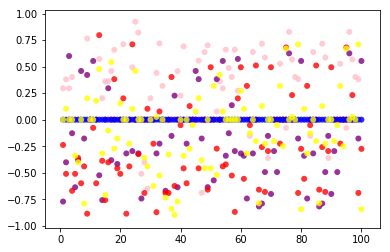

In [10]:
#Plotting the graph for each media source
for media in Media_Source:
    # Creating a temporary data frame to store for only one media channel at a time
    Temp_DF=Sentiment_DF[Sentiment_DF["Media"]==media]
    plt.scatter(Temp_DF["Tweets Ago"],Temp_DF["Compound"], marker="o", linewidth=0, alpha=0.8, label=media,
                facecolors=Temp_DF.Media.map({"CBS": "pink", "CTVNews" : "purple",  "CNN": 'red',
                                              "FoxNews":"blue","nytimes":"yellow"}))

No handles with labels found to put in legend.


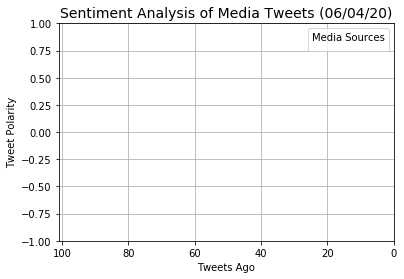

In [11]:
#plt.hlines(0,0,np.arange(len(Sentiment_DF["Compound"])),alpha=1)
# Setting the legend 
plt.legend(bbox_to_anchor = (1,1),title="Media Sources")
# Setting the title,x_axis and y_axis labels
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")), fontsize=14)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Setting the x_axis and y_axis limits
plt.xlim(101,0)
plt.ylim(-1,1)
# Setting the grid
plt.grid(True)

# Saving the figue
plt.savefig("Output/Sentiment Analysis of Media Tweets.png",bbox_inches='tight')

plt.show()

In [12]:
# Calculating the mean for each Media channel and storing to a dataframe
Media_Compound_Means=Sentiment_DF.groupby("Media").mean()["Compound"].to_frame()
#Resetting the index 
Media_Compound_Means.reset_index(inplace=True)

Media_Compound_Means


,Media,Compound
0,CBS,0.217150
1,CNN,-0.165524
2,CTVNews,-0.142087
3,FoxNews,0.000000
4,nytimes,-0.098574
